In [1]:
# un histograma es una gráfica de que muestra la distribución de frecuencias de un conjunto de datos.
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv


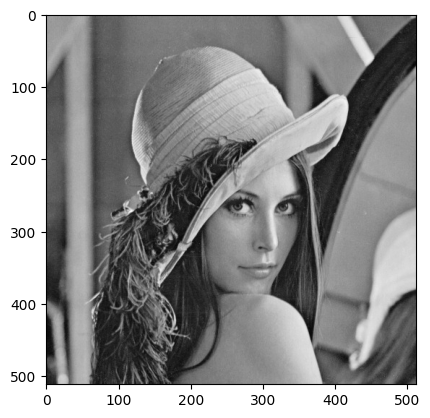

In [3]:
img = cv.imread('../images/lena.jpg',0)
plt.imshow(img, cmap = 'gray')

In [5]:
histograma = cv.calcHist(img, [0], None, [256], (0,255))

In [6]:
type(histograma)

numpy.ndarray

In [7]:

histograma.shape

(256, 1)

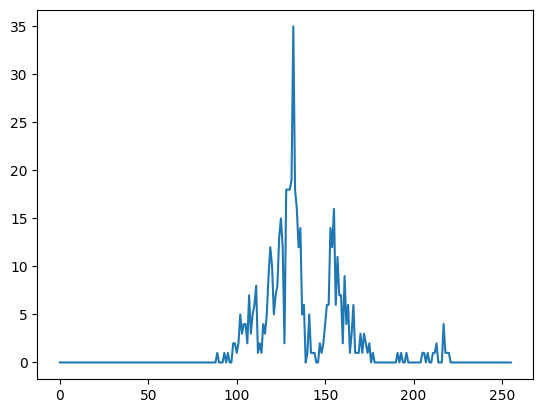

In [8]:
plt.plot(histograma)